#Regression №1

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import fetch_california_housing

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

In [ ]:
house_data =  fetch_california_housing()

In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Визуализируем распределения признаков в датасете

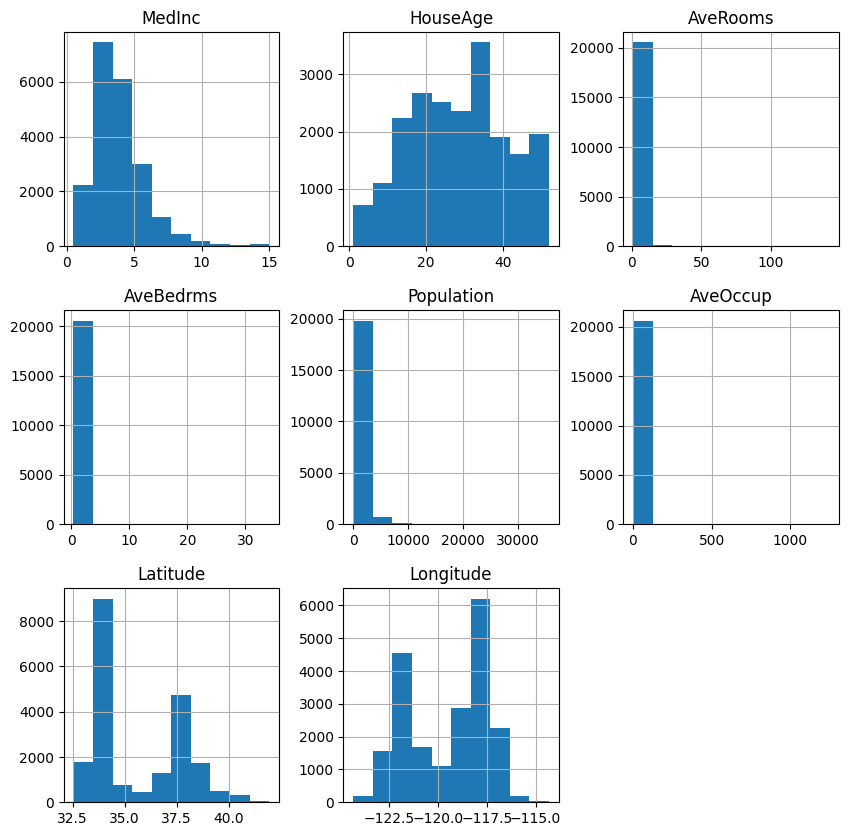

In [ ]:
_ =X.hist(X.columns, figsize=(10, 10))

Разобьём выборку на train и test в соотношении 75/25

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [ ]:
y_train.shape, y_test.shape

((15480,), (5160,))

Выполним нормировку данных

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучим линейную регрессию и подсчитаем её качество на тесте.

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

print('Train R^2: ', model.score(X_train,y_train ))
print('Test R^2: ', model.score(X_test,y_test ))

Train MSE:  0.523213089566045
Test MSE:  0.5358075281269412
Train MAE:  0.5300955391321904
Test MAE:  0.5332838429002886
Train R^2:  0.6049321703240884
Test R^2:  0.6039481376872007


Визуализируем получившиеся веса

<BarContainer object of 8 artists>

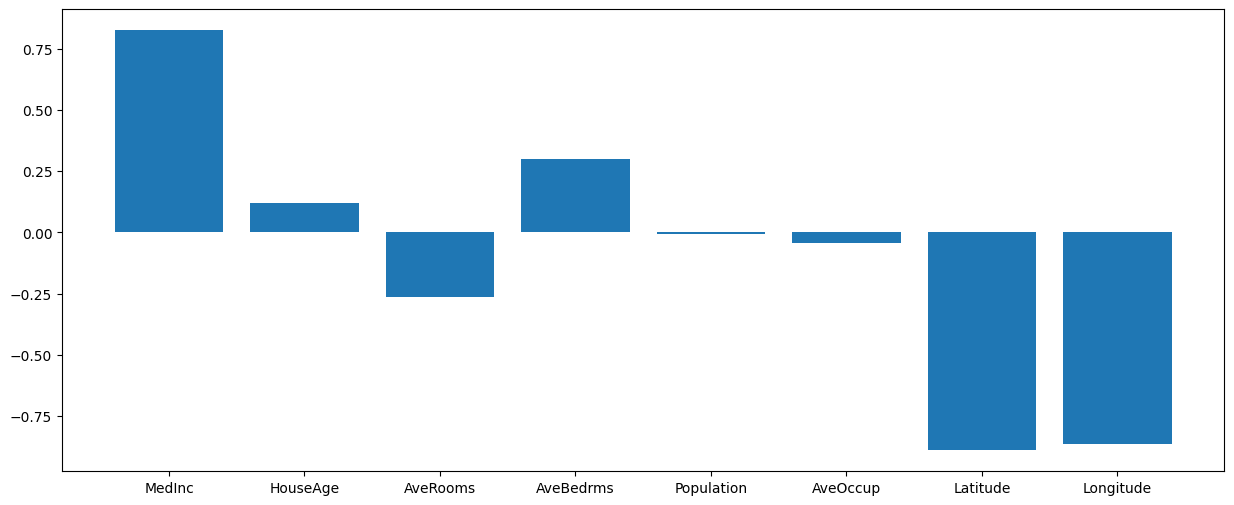

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(X.columns, model.coef_)

#Linear Regression №2

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Загрузка датасета

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Linear Regression - Sheet1.csv')

Разделение данных на зависимые и независимые

In [ ]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

Разделение данных на train и test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

Учебный набор данных

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

Результат прогноза для тестового набора

In [ ]:
y_pred=regressor.predict(x_test)

Построение графика train

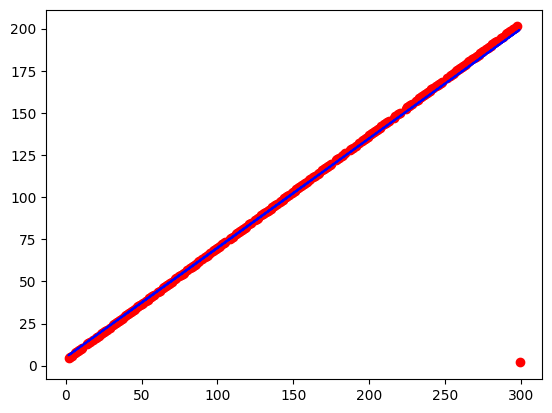

In [ ]:
plt.scatter(x_train,y_train , color="red")
plt.plot(x_train,regressor.predict(x_train),color="blue")

Построение графика test

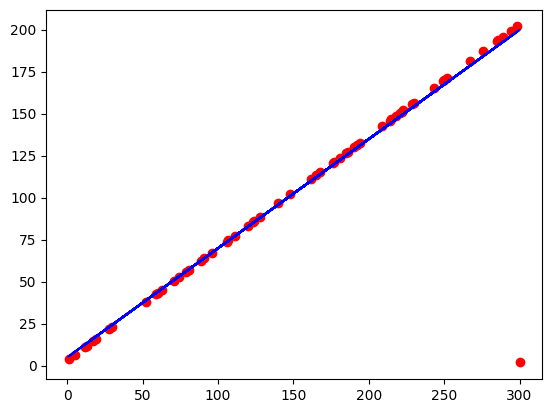

In [ ]:
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,y_pred,color="blue")

# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

Группируем данные

In [ ]:
#импорт датасета с Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv (url)

In [ ]:
#первые шесть строк
data[0:6]

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
5,0,1,919.588530,7491.558572


по умолчанию: указывает, нарушил ли индивидуум дефолт.
студент: Указывает, является ли человек студентом.
баланс: средний баланс, который несет физическое лицо.
доход: Доход физического лица.

In [ ]:
len(data. index )

10000

обучающая и тестовая выборки

In [ ]:
X = data[['student', 'balance', 'income']]
y = data['default']
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=0)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict (X_test)

Диагностика модели

In [ ]:
cnf_matrix = metrics. confusion_matrix (y_test, y_pred)
cnf_matrix

array([[2870,   17],
       [  93,   20]])

Истинно положительных предсказаний: 2870
Истинно отрицательные прогнозы: 17
Ложноположительные прогнозы: 93
Ложноотрицательные прогнозы: 20

In [ ]:
print(" Accuracy:", metrics.accuracy_score(y_test, y_pred)) #точность

 Accuracy: 0.9633333333333334


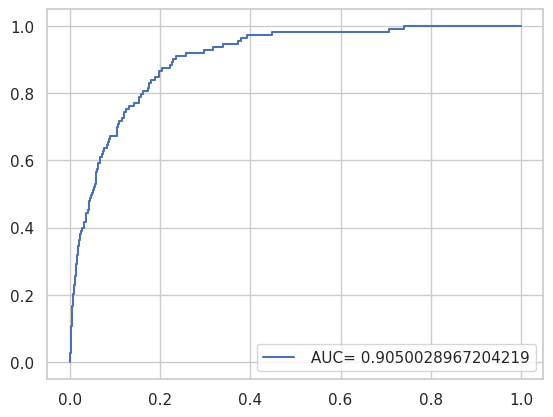

In [ ]:
y_pred_proba = log_regression. predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics. roc_curve (y_test, y_pred_proba)
auc = metrics. roc_auc_score (y_test, y_pred_proba)

#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()